In [1]:
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url='https://raw.githubusercontent.com/wkrzemien/dataScienceAndML2020/master/datasets/iris_data.csv'
urllib.request.urlretrieve(url,'iris_data.csv')
input_file = 'iris_data.csv'
data = pd.read_csv(input_file)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataSetosa=data[data['species']=='Iris-setosa']
dataVersicolor=data[data['species']=='Iris-versicolor']
dataVirginica=data[data['species']=='Iris-virginica']
datasets =[dataSetosa,dataVersicolor,dataVirginica]

dLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [58]:
#Function calculating mean
def Mean(dataSet, label):
    mean = 0
    for ic in dataSet[label]:
        mean = mean + ic
    mean = mean/len(dataSet[label])
    return mean
#Function calculating variance
def Variance(dataSet, label):
    mean = Mean(dataSet, label)
    variance = 0
    for ic in dataSet[label]:
        variance = variance + math.pow(ic - mean, 2)
    variance = variance/len(dataSet[label])
    variance = math.sqrt(variance)
    return variance

In [67]:
#Standarization, we assume only 2 features it can be easyli expand to higher dimension
#This return data set after standartization
def Standarization(dataSet, Xaxis, Yaxis):
    #We need to calucalte mean and variance for each feature
    MeanX = Mean(dataSet, Xaxis)
    VarianceX = Variance(dataSet, Xaxis)
    MeanY = Mean(dataSet, Yaxis)
    VarianceY = Variance(dataSet, Yaxis)
    
    FeatureX = []
    FeatureY = []
    for v in dataSet[Xaxis]:
        FeatureX.append((v-MeanX)/VarianceX)
    for v in dataSet[Yaxis]:
        FeatureY.append((v-MeanY)/VarianceY)
        
    return [FeatureX, FeatureY]        

In [84]:
dataStandarizedSetosa     = Standarization(dataSetosa, 'sepal_length', 'sepal_width')
dataStandarizedVersicolor = Standarization(dataVersicolor, 'sepal_length', 'sepal_width')
dataStandarizedVirginica  = Standarization(dataVirginica, 'sepal_length', 'sepal_width')

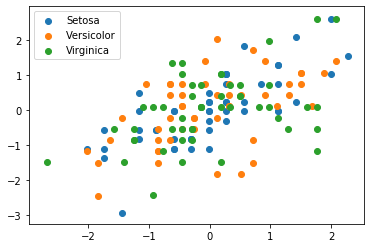

In [90]:
#Now we plot data sets after standarization
plt.scatter(dataStandarizedSetosa[0], dataStandarizedSetosa[1], label='Setosa')
plt.scatter(dataStandarizedVersicolor[0], dataStandarizedVersicolor[1], label='Versicolor')
plt.scatter(dataStandarizedVirginica[0], dataStandarizedVirginica[1], label='Virginica')

plt.legend()
plt.show()

In [104]:
#Standarization
def Normalization(dataSet, Xaxis, Yaxis):
    #First we need max and min for each feature

    minX = min(dataSet[Xaxis])
    maxX = max(dataSet[Xaxis])

    minY = min(dataSet[Yaxis])
    maxY = max(dataSet[Yaxis])
    
    FeatureX = []
    FeatureY = []
    
    for v in dataSet[Xaxis]:
        FeatureX.append( (v-minX)/(maxX-minX) )
    for v in dataSet[Yaxis]:
        FeatureY.append( (v-minY)/(maxY-minY) )
        
    return [FeatureX, FeatureY]  

In [105]:
dataNormalizedSetosa     = Normalization(dataSetosa, 'sepal_length', 'sepal_width')
dataNormalizedVersicolor = Normalization(dataVersicolor, 'sepal_length', 'sepal_width')
dataNormalizedVirginica  = Normalization(dataVirginica, 'sepal_length', 'sepal_width')

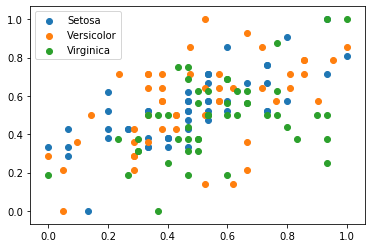

In [106]:
#Now we plot data sets after normalization
plt.scatter(dataNormalizedSetosa[0], dataNormalizedSetosa[1], label='Setosa')
plt.scatter(dataNormalizedVersicolor[0], dataNormalizedVersicolor[1], label='Versicolor')
plt.scatter(dataNormalizedVirginica[0], dataNormalizedVirginica[1], label='Virginica')

plt.legend()
plt.show()

#Values from 0 to 1, which means it works :)